# Importing Dataset

In [1]:
import pandas as pd

# Load the dataset
file_path = "/kaggle/input/covid-data/imputed-data.csv"
df = pd.read_csv(file_path)

# Display first few rows
df.head()


,date,county_fips,county_name,state_fips,state_name,covid_19_confirmed_cases,covid_19_deaths,social_distancing_total_grade,social_distancing_encounters_grade,social_distancing_travel_distance_grade,...,age_45_49,age_50_54,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_or_higher,immigrant_student_ratio
0,01/22/20,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
1,01/23/20,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
2,01/24/20,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
3,01/25/20,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048
4,01/26/20,1003,Baldwin County,1,Alabama,0.0,0.0,F,F,F,...,7,7,7,7,6,4,3,2,2,0.021048


# PreProcessing Dataset

In [3]:
# Check dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145769 entries, 0 to 145768
Data columns (total 58 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   date                                     145769 non-null  object 
 1   county_fips                              145769 non-null  int64  
 2   county_name                              145769 non-null  object 
 3   state_fips                               145769 non-null  int64  
 4   state_name                               145769 non-null  object 
 5   covid_19_confirmed_cases                 145769 non-null  float64
 6   covid_19_deaths                          145769 non-null  float64
 7   social_distancing_total_grade            145769 non-null  object 
 8   social_distancing_encounters_grade       145769 non-null  object 
 9   social_distancing_travel_distance_grade  145769 non-null  object 
 10  daily_state_test                

In [4]:
# Count missing values per column
df.isnull().sum()


date                                       0
county_fips                                0
county_name                                0
state_fips                                 0
state_name                                 0
covid_19_confirmed_cases                   0
covid_19_deaths                            0
social_distancing_total_grade              0
social_distancing_encounters_grade         0
social_distancing_travel_distance_grade    0
daily_state_test                           0
precipitation                              0
temperature                                0
virus_pressure                             0
total_population                           0
female_percent                             0
area                                       0
population_density                         0
latitude                                   0
longitude                                  0
hospital_beds_ratio                        0
ventilator_capacity_ratio                  0
icu_beds_r

In [5]:
# Summary statistics of numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
county_fips,145769.0,11294.986101,5755.578051,1003.000000,6039.000000,12109.000000,17071.000000,1.908500e+04
state_fips,145769.0,11.216912,5.746805,1.000000,6.000000,12.000000,17.000000,1.900000e+01
covid_19_confirmed_cases,145769.0,17.422902,108.313131,0.000000,0.000000,0.000000,5.000000,8.903000e+03
covid_19_deaths,145769.0,0.400284,2.862694,0.000000,0.000000,0.000000,0.000000,1.420000e+02
daily_state_test,145769.0,13028.396919,23610.581637,0.000000,50.000000,4438.000000,13313.000000,1.879260e+05
precipitation,145769.0,29.785673,86.780567,0.000000,0.000000,0.000000,18.000000,3.048000e+03
temperature,145769.0,16.594227,9.577923,-42.200000,9.640000,18.680000,24.620000,6.560000e+01
virus_pressure,145769.0,17.175501,66.953436,0.000000,0.000000,1.857143,9.333333,3.178667e+03
total_population,145769.0,183719.266881,595690.653204,1876.000000,16134.000000,33976.000000,124806.000000,1.010552e+07
female_percent,145769.0,0.499320,0.023412,0.268351,0.494141,0.503701,0.511262,5.687054e-01


In [6]:
# Convert the date column to datetime format
df["date"] = pd.to_datetime(df["date"], errors='coerce')
df["date"].head()


<ipython-input-6-15ed6e0ad671>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors='coerce')


0   2020-01-22
1   2020-01-23
2   2020-01-24
3   2020-01-25
4   2020-01-26
Name: date, dtype: datetime64[ns]

In [7]:
# Drop categorical columns with no variance
df_cleaned = df.drop(columns=["county_name", "state_name", "social_distancing_total_grade",
                              "social_distancing_encounters_grade", "social_distancing_travel_distance_grade"])

# Check updated structure
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145769 entries, 0 to 145768
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   date                           145769 non-null  datetime64[ns]
 1   county_fips                    145769 non-null  int64         
 2   state_fips                     145769 non-null  int64         
 3   covid_19_confirmed_cases       145769 non-null  float64       
 4   covid_19_deaths                145769 non-null  float64       
 5   daily_state_test               145769 non-null  float64       
 6   precipitation                  145769 non-null  float64       
 7   temperature                    145769 non-null  float64       
 8   virus_pressure                 145769 non-null  float64       
 9   total_population               145769 non-null  int64         
 10  female_percent                 145769 non-null  float64       
 11  

In [8]:
# Fill missing values with median for numerical columns
df_cleaned.fillna(df_cleaned.median(), inplace=True)

# Check if any missing values remain
df_cleaned.isnull().sum().sum()


0

# Checking Data distribution

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


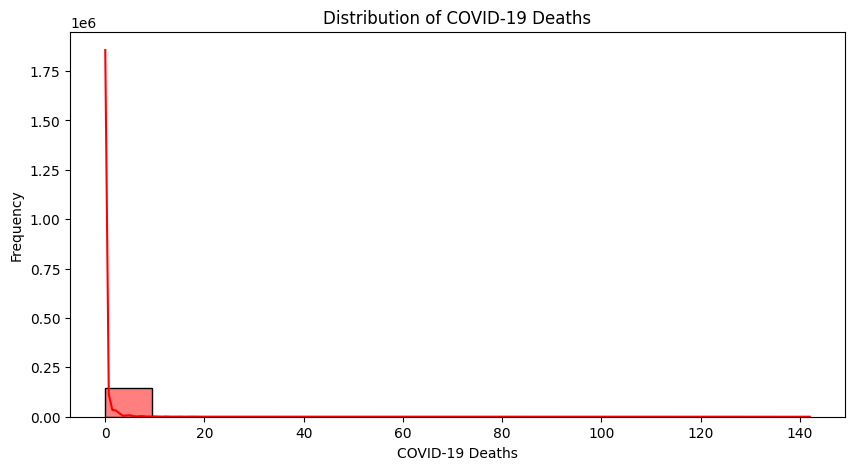

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["covid_19_deaths"], bins=15, kde=True, color='red')
plt.xlabel("COVID-19 Deaths")
plt.ylabel("Frequency")
plt.title("Distribution of COVID-19 Deaths")
plt.show()


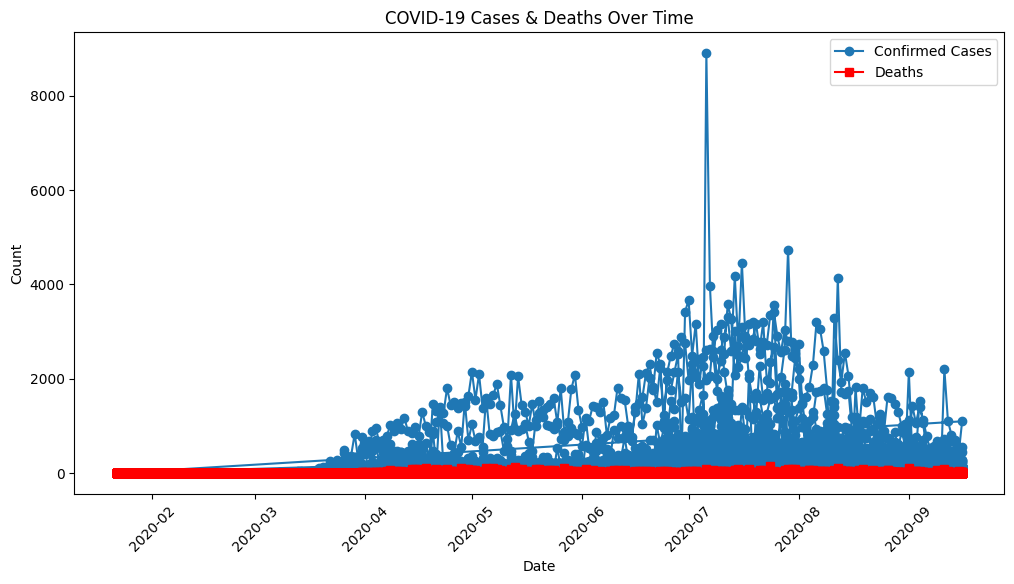

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned["date"], df_cleaned["covid_19_confirmed_cases"], label="Confirmed Cases", marker='o')
plt.plot(df_cleaned["date"], df_cleaned["covid_19_deaths"], label="Deaths", marker='s', color='red')
plt.xlabel("Date")
plt.ylabel("Count")
plt.title("COVID-19 Cases & Deaths Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


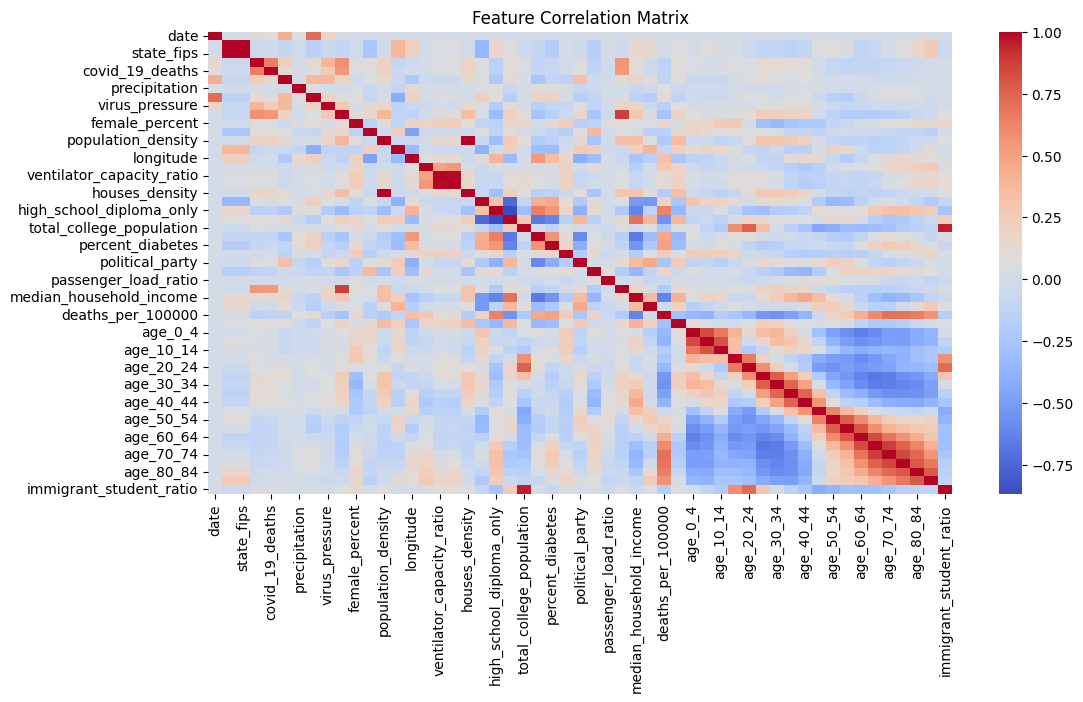

In [11]:
# Compute correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


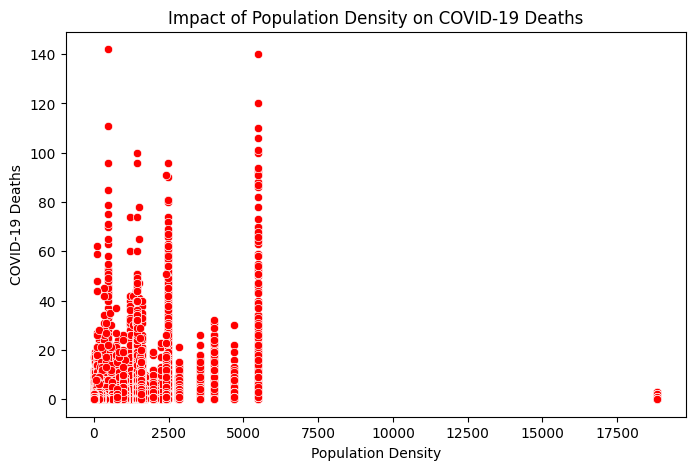

In [12]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["population_density"], y=df_cleaned["covid_19_deaths"], color="red")
plt.xlabel("Population Density")
plt.ylabel("COVID-19 Deaths")
plt.title("Impact of Population Density on COVID-19 Deaths")
plt.show()


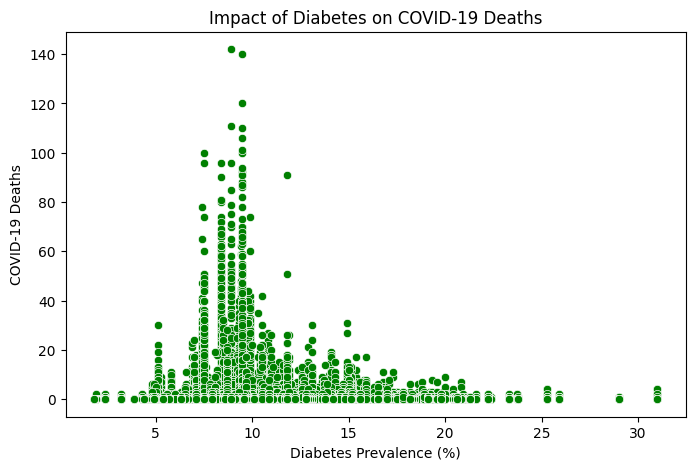

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cleaned["percent_diabetes"], y=df_cleaned["covid_19_deaths"], color="green")
plt.xlabel("Diabetes Prevalence (%)")
plt.ylabel("COVID-19 Deaths")
plt.title("Impact of Diabetes on COVID-19 Deaths")
plt.show()


In [14]:
print(df_cleaned.columns)


Index(['date', 'county_fips', 'state_fips', 'covid_19_confirmed_cases',
       'covid_19_deaths', 'daily_state_test', 'precipitation', 'temperature',
       'virus_pressure', 'total_population', 'female_percent', 'area',
       'population_density', 'latitude', 'longitude', 'hospital_beds_ratio',
       'ventilator_capacity_ratio', 'icu_beds_ratio', 'houses_density',
       'less_than_high_school_diploma', 'high_school_diploma_only',
       'some_college_or_higher', 'total_college_population', 'percent_smokers',
       'percent_diabetes', 'Religious_congregation_ratio', 'political_party',
       'airport_distance', 'passenger_load_ratio', 'meat_plants',
       'median_household_income', 'percent_insured', 'deaths_per_100000',
       'gdp_per_capita', 'age_0_4', 'age_5_9', 'age_10_14', 'age_15_19',
       'age_20_24', 'age_25_29', 'age_30_34', 'age_35_39', 'age_40_44',
       'age_45_49', 'age_50_54', 'age_55_59', 'age_60_64', 'age_65_69',
       'age_70_74', 'age_75_79', 'age_80_84', '

# Making new variable for ages 65 +

In [15]:
df_cleaned["age_65_plus"] = (
    df_cleaned["age_65_69"] + 
    df_cleaned["age_70_74"] + 
    df_cleaned["age_75_79"] + 
    df_cleaned["age_80_84"] + 
    df_cleaned["age_85_or_higher"]
)


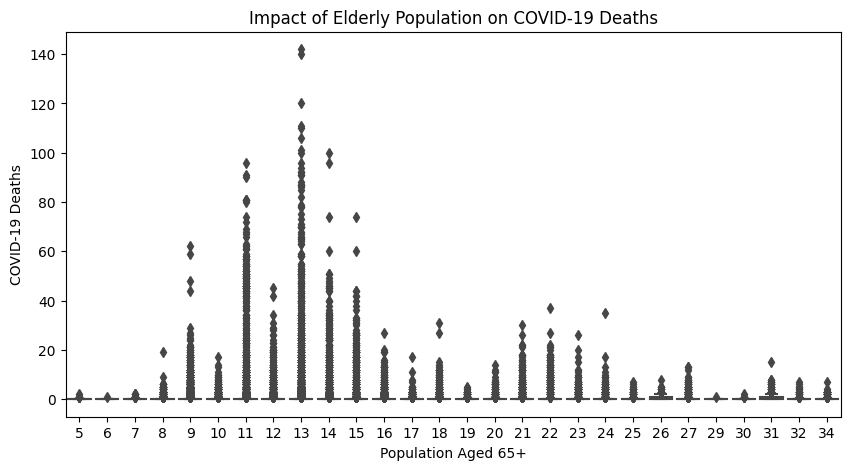

In [16]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned["age_65_plus"], y=df_cleaned["covid_19_deaths"])
plt.xlabel("Population Aged 65+")
plt.ylabel("COVID-19 Deaths")
plt.title("Impact of Elderly Population on COVID-19 Deaths")
plt.show()


# Using Gpu

In [17]:
import tensorflow as tf
import torch

# Check GPU availability
print("TensorFlow GPU Available:", tf.config.list_physical_devices('GPU'))
print("PyTorch GPU Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA Device Name:", torch.cuda.get_device_name(0))

# Enable GPU for TensorFlow
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is enabled for TensorFlow")
    except RuntimeError as e:
        print(e)

# Set device for PyTorch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


TensorFlow GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
PyTorch GPU Available: True
CUDA Device Name: Tesla P100-PCIE-16GB
GPU is enabled for TensorFlow
Using device: cuda


In [18]:
# Select features and target variable
features = ["population_density", "percent_diabetes", "percent_smokers", "age_65_plus"]
X = df_cleaned[features]
y = df_cleaned["covid_19_deaths"]


# Initializing Machine Learning model

In [19]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


# XGBRegressor

In [22]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


# Model Evaluation

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def evaluate_model(y_true, y_pred, model_name):
    """Evaluates a classification model and prints key metrics."""
    print(f"\nModel Evaluation: {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

# Convert probabilities to class labels (for binary classification)
y_pred_xgb_labels = (y_pred_xgb >= 0.5).astype(int)  

# For multi-class classification, use argmax instead
# y_pred_xgb_labels = np.argmax(y_pred_xgb, axis=1)  

# Now evaluate the model
evaluate_model(y_test, y_pred_xgb_labels, "XGBoost")




Model Evaluation: XGBoost
Accuracy: 0.8267476161075668
Precision: 0.8465956523942213
Recall: 0.8267476161075668
F1 Score: 0.8338350937115773

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     25982
         1.0       0.14      0.35      0.20      1693
         2.0       0.00      0.00      0.00       524
         3.0       0.00      0.00      0.00       301
         4.0       0.00      0.00      0.00       153
         5.0       0.00      0.00      0.00       101
         6.0       0.00      0.00      0.00        74
         7.0       0.00      0.00      0.00        52
         8.0       0.00      0.00      0.00        34
         9.0       0.00      0.00      0.00        24
        10.0       0.00      0.00      0.00        15
        11.0       0.00      0.00      0.00        20
        12.0       0.00      0.00      0.00        22
        13.0       0.00      0.00      0.00         7
        14.0       0.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

# Deep Neural Network model

In [44]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
nn_model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1)  # Output layer
])

# Compile the model
nn_model.compile(optimizer="adam", loss="mse", metrics=["mae"])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=10, verbose=1)


Epoch 1/30
11662/11662 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 13.9452 - mae: 0.7558 - val_loss: 7.5409 - val_mae: 0.5634
Epoch 2/30
11662/11662 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 7.5742 - mae: 0.6201 - val_loss: 7.5873 - val_mae: 0.8223
Epoch 3/30
11662/11662 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 7.9639 - mae: 0.6687 - val_loss: 7.4985 - val_mae: 0.6198
Epoch 4/30
11662/11662 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 7.1400 - mae: 0.6602 - val_loss: 8.0534 - val_mae: 1.0784
Epoch 5/30
11662/11662 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 8.3282 - mae: 0.6934 - val_loss: 7.4044 - val_mae: 0.7113
Epoch 6/30
11662/11662 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 7.7288 - mae: 0.7011 - val_loss: 7.3300 - val_mae: 0.6478
Epoch 7/30
11662/11662 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 7.3261 - mae: 0.6880 - val_loss: 7.3580 - val_mae: 0.6759
Epoch 8/30
11662/11662 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 7.9940 - mae: 0.6969 - val_loss: 7.3658 - val_mae: 0.6575
Epoch 9/30
1166

# Loss overtime epochs

# Model Evaluation of DNN

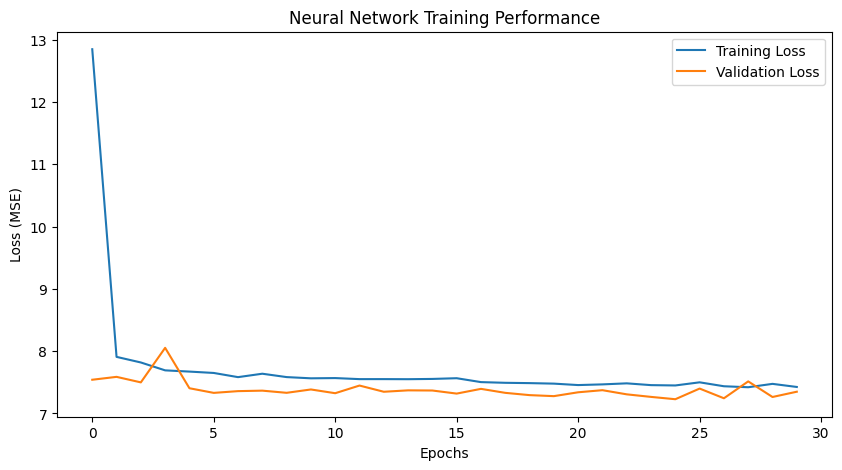

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Neural Network Training Performance")
plt.legend()
plt.show()


In [49]:
y_pred_nn_labels = (y_pred_nn.flatten() >= 0.5).astype(int)  
evaluate_model(y_test, y_pred_nn_labels, "Neural Network")



Model Evaluation: Neural Network
Accuracy: 0.6996981546271523
Precision: 0.8489588462440727
Recall: 0.6996981546271523
F1 Score: 0.7555824470489431

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.75      0.84     25982
         1.0       0.11      0.55      0.18      1693
         2.0       0.00      0.00      0.00       524
         3.0       0.00      0.00      0.00       301
         4.0       0.00      0.00      0.00       153
         5.0       0.00      0.00      0.00       101
         6.0       0.00      0.00      0.00        74
         7.0       0.00      0.00      0.00        52
         8.0       0.00      0.00      0.00        34
         9.0       0.00      0.00      0.00        24
        10.0       0.00      0.00      0.00        15
        11.0       0.00      0.00      0.00        20
        12.0       0.00      0.00      0.00        22
        13.0       0.00      0.00      0.00         7
        14.0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

# Combine Model Evaluations

In [61]:
# Convert predicted probabilities to class labels
y_pred_rf_labels = (y_pred_rf >= 0.5).astype(int)  
y_pred_xgb_labels = np.argmax(y_pred_xgb, axis=1) if y_pred_xgb.ndim > 1 else (y_pred_xgb >= 0.5).astype(int)
y_pred_nn_labels = np.argmax(y_pred_nn, axis=1) if y_pred_nn.ndim > 1 else (y_pred_nn.flatten() >= 0.5).astype(int)

# Create a DataFrame for model evaluation results
results_df = pd.DataFrame([
    evaluate_model(y_test, y_pred_rf_labels, "Random Forest"),
    evaluate_model(y_test, y_pred_xgb_labels, "XGBoost"),
    evaluate_model(y_test, y_pred_nn_labels, "Neural Network")
])

results_df



Model Evaluation: Random Forest
Accuracy: 0.8276394319818893
Precision: 0.8460688957741066
Recall: 0.8276394319818893
F1 Score: 0.8341618409636609

Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.92     25982
         1.0       0.14      0.34      0.20      1693
         2.0       0.00      0.00      0.00       524
         3.0       0.00      0.00      0.00       301
         4.0       0.00      0.00      0.00       153
         5.0       0.00      0.00      0.00       101
         6.0       0.00      0.00      0.00        74
         7.0       0.00      0.00      0.00        52
         8.0       0.00      0.00      0.00        34
         9.0       0.00      0.00      0.00        24
        10.0       0.00      0.00      0.00        15
        11.0       0.00      0.00      0.00        20
        12.0       0.00      0.00      0.00        22
        13.0       0.00      0.00      0.00         7
        14.0    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13


Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     25982
         1.0       0.14      0.35      0.20      1693
         2.0       0.00      0.00      0.00       524
         3.0       0.00      0.00      0.00       301
         4.0       0.00      0.00      0.00       153
         5.0       0.00      0.00      0.00       101
         6.0       0.00      0.00      0.00        74
         7.0       0.00      0.00      0.00        52
         8.0       0.00      0.00      0.00        34
         9.0       0.00      0.00      0.00        24
        10.0       0.00      0.00      0.00        15
        11.0       0.00      0.00      0.00        20
        12.0       0.00      0.00      0.00        22
        13.0       0.00      0.00      0.00         7
        14.0       0.00      0.00      0.00        12
        15.0       0.00      0.00      0.00         6
        16.0       0.00      0.00      0.00        14
  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

,0
0,None
1,None
2,None


In [71]:
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_true, y_pred, average='weighted', zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, average='weighted', zero_division=0),
        "R2 Score": r2_score(y_true, y_pred) if len(np.unique(y_true)) > 2 else None  # Only for regression tasks
    }


In [72]:
results_df = pd.DataFrame([
    evaluate_model(y_test, y_pred_rf_labels, "Random Forest"),
    evaluate_model(y_test, y_pred_xgb_labels, "XGBoost"),
    evaluate_model(y_test, y_pred_nn_labels, "Neural Network")
])


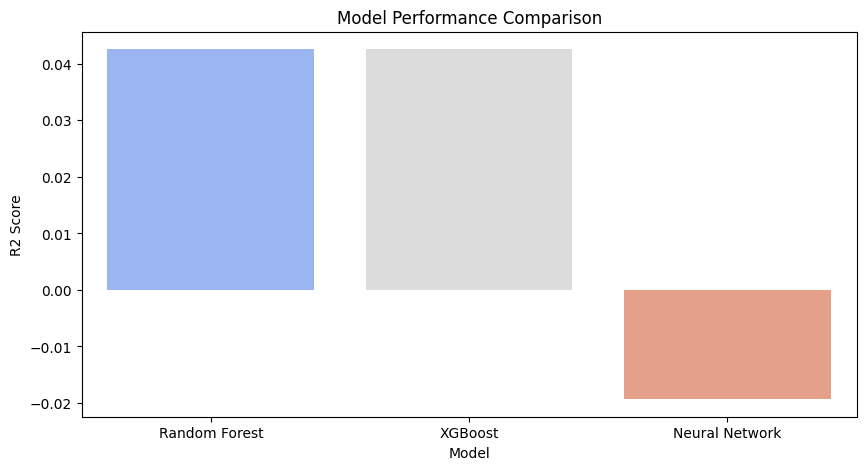

In [73]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="R2 Score", data=results_df, palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("Model Performance Comparison")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

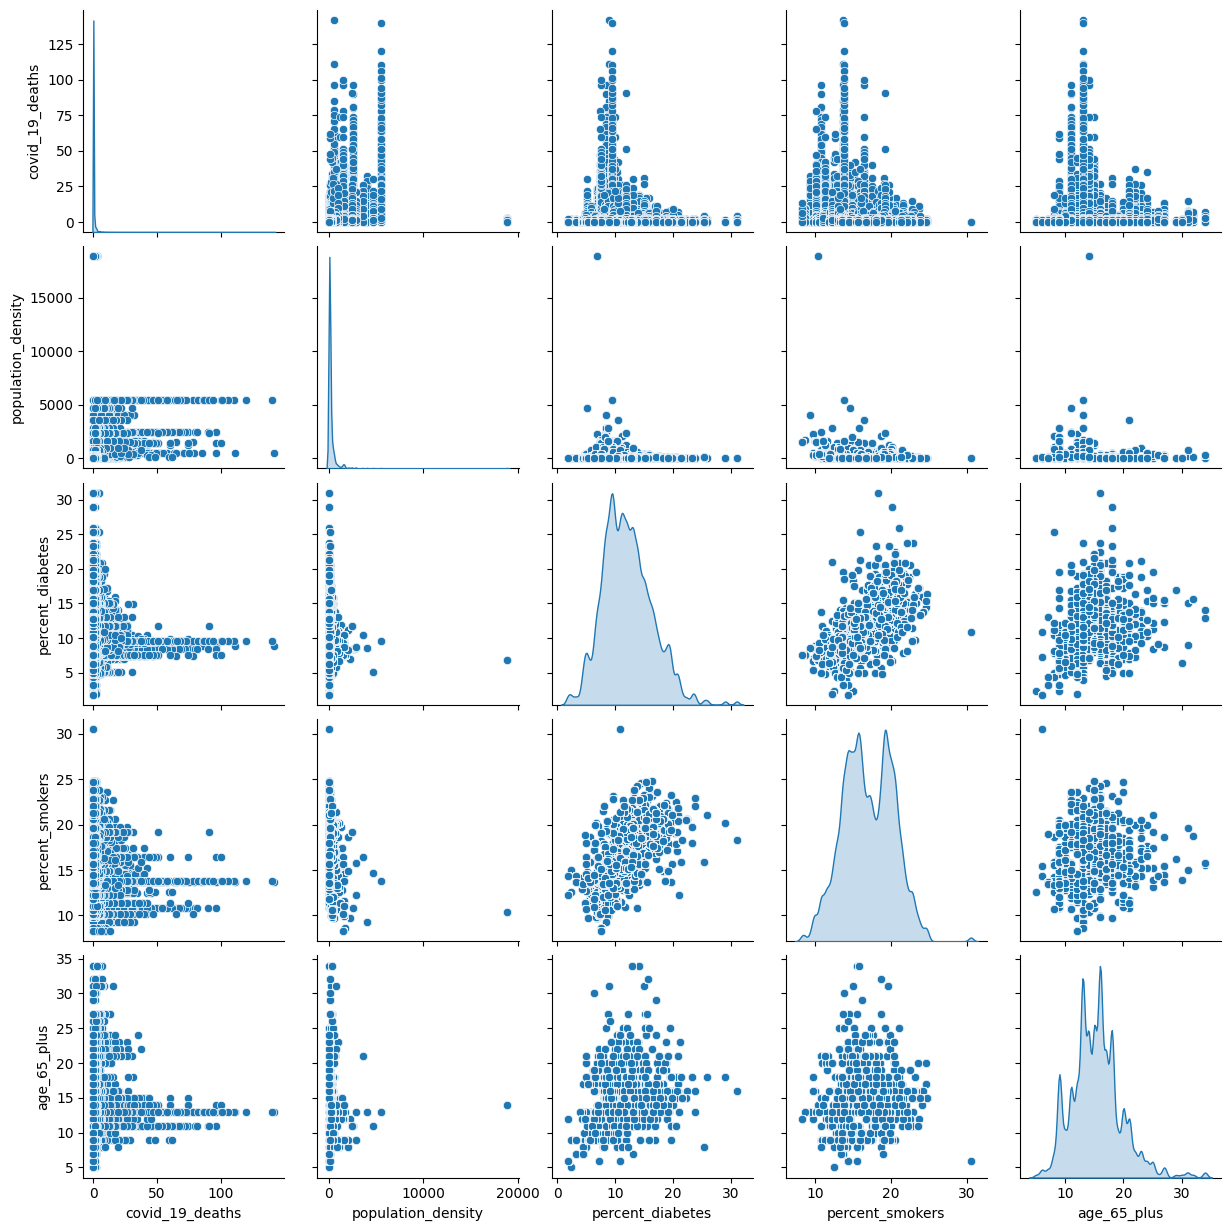

In [74]:
sns.pairplot(df_cleaned[["covid_19_deaths", "population_density", "percent_diabetes", "percent_smokers", "age_65_plus"]], diag_kind="kde")
plt.show()


# Analyzing impacts of variables

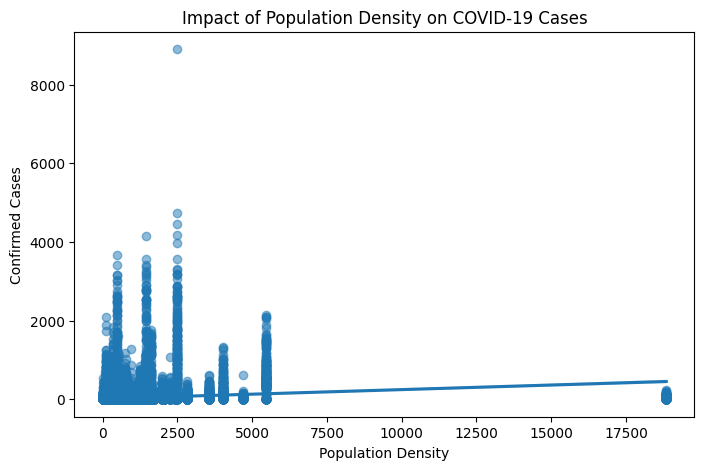

In [75]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df_cleaned["population_density"], y=df_cleaned["covid_19_confirmed_cases"], scatter_kws={"alpha": 0.5})
plt.xlabel("Population Density")
plt.ylabel("Confirmed Cases")
plt.title("Impact of Population Density on COVID-19 Cases")
plt.show()


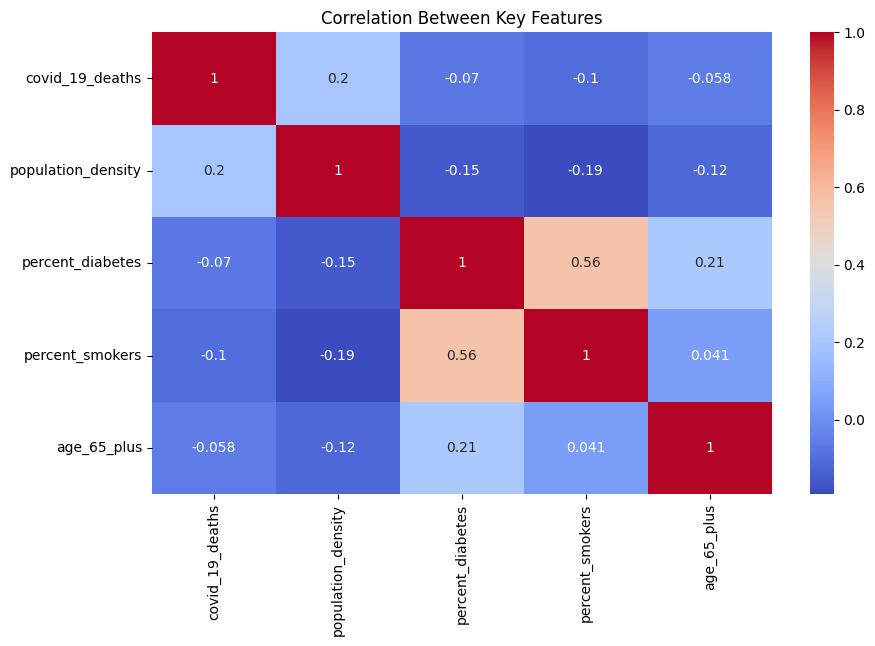

In [76]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned[["covid_19_deaths", "population_density", "percent_diabetes", "percent_smokers", "age_65_plus"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Key Features")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


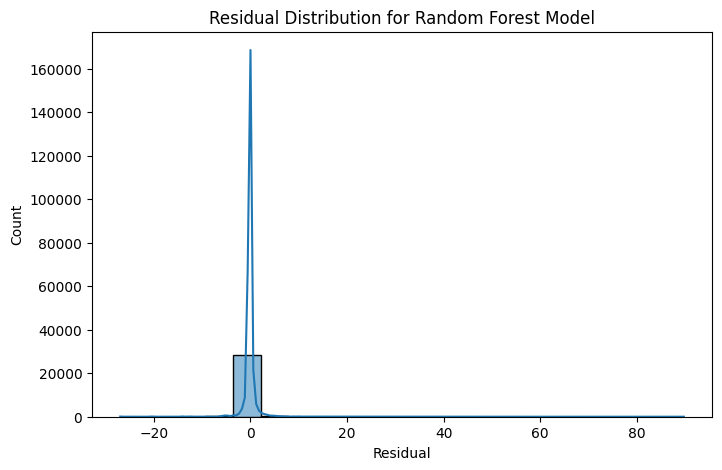

In [77]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Residual Distribution for Random Forest Model")
plt.show()


In [78]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the cases column
scaler = MinMaxScaler(feature_range=(0, 1))
df_cleaned["cases_scaled"] = scaler.fit_transform(df_cleaned["covid_19_confirmed_cases"].values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X_seq, y_seq = create_sequences(df_cleaned["cases_scaled"].values, seq_length)
X_seq = X_seq.reshape(X_seq.shape[0], X_seq.shape[1], 1)  # Reshape for LSTM input


# Building and training LSTM model

In [80]:
from tensorflow.keras.layers import LSTM

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])

# Compile model
lstm_model.compile(optimizer="adam", loss="mse")

# Train model
lstm_model.fit(X_seq, y_seq, epochs=30, batch_size=16, verbose=1)


Epoch 1/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - loss: 4.7671e-05
Epoch 2/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 3.0160e-05
Epoch 3/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 3.8167e-05
Epoch 4/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 3.5986e-05
Epoch 5/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 3.1511e-05
Epoch 6/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 2.6521e-05
Epoch 7/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 2.5421e-05
Epoch 8/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 2.7079e-05
Epoch 9/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 2.9223e-05
Epoch 10/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 2.5638e-05
Epoch 11/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 2.4258e-05
Epoch 12/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 3.1868e-05
Epoch 13/30
9110/9110 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - loss: 2.4527e-05
Epoch 14/30
9110/9110 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


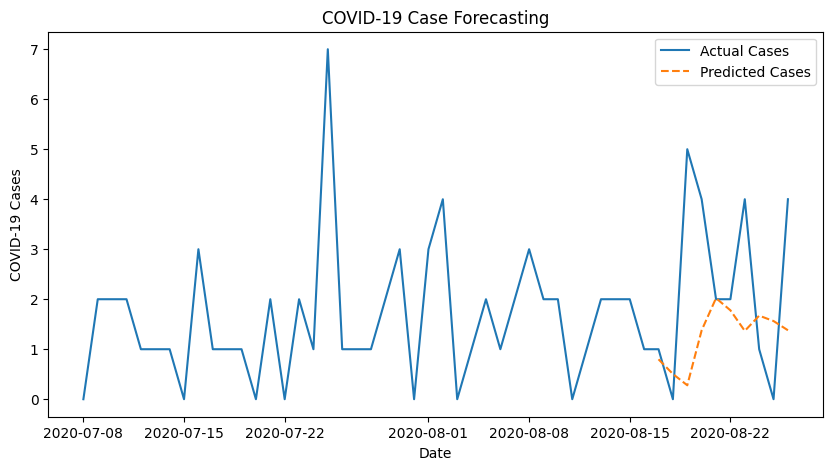

In [81]:
# Generate future predictions
future_predictions = lstm_model.predict(X_seq[-10:])
future_cases = scaler.inverse_transform(future_predictions)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(df_cleaned["date"][-50:], df_cleaned["covid_19_confirmed_cases"][-50:], label="Actual Cases")
plt.plot(df_cleaned["date"][-10:], future_cases, label="Predicted Cases", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("COVID-19 Cases")
plt.title("COVID-19 Case Forecasting")
plt.legend()
plt.show()


# Summary

In [82]:
results_df.sort_values(by="R2 Score", ascending=False)


,Model,Accuracy,Precision,Recall,F1 Score,R2 Score
0,Random Forest,0.827639,0.846069,0.827639,0.834162,0.042583
1,XGBoost,0.826748,0.846596,0.826748,0.833835,0.042536
2,Neural Network,0.891198,0.794235,0.891198,0.839927,-0.019329
